This is the second tutorial. In this tutorial, you need to do the following things

1. Download the data from <a href="https://www.dropbox.com/s/y32w0bqq1o1rmsr/Wholesale%20customers%20data.csv?dl=0">here</a> and store it in your computer
2. Find out mean of all the variables except for "Channel" and "Region"
3. Mind out median of all the variables (except for "Channel" and "Region") and calculate the difference between mean and median programmatically.
4. Define a user defined function which can take a data frame having all numeric values and can send out IQR values of all the variables. Test the function on the dataset you have downloaded
5. Find out the function **MinCovDet** within sklearn and using it find out the robust Mahalanobis distance between the point (10000,10000,10000,10000,10000,10000) and the first row of the downloaded dataset after discarding "Channel" and "Region"
6. Run PCA on the 6 numeric variables (except "Channel" and "Region") and decide how many components you would like to retain.
7. As you have already extracted median values of the 6 items, extract robust Mahalanobis distance of each sample from the median (i.e. a datapoint containing the 6 medians). How many outliers can you see?
8. Try to remove the outliers and then run kmeans clustering on the remaining data points. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.covariance import MinCovDet 


In [8]:
wholesale = pd.read_csv("C:\\Users\\Umang\\Downloads\\Wholesale customers data.csv")
wholesale.head()
print(wholesale.shape)
wholesale.head()

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
mean = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
for i in mean:
    a=wholesale[i].mean()
    b=round(a,2)
    print("mean of ",i,"is ",b)

mean of  Fresh is  12000.3
mean of  Milk is  5796.27
mean of  Grocery is  7951.28
mean of  Frozen is  3071.93
mean of  Detergents_Paper is  2881.49
mean of  Delicassen is  1524.87


# mean

In [19]:
wholesale[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].apply(lambda x:round(x.mean(),2))

Fresh               12000.30
Milk                 5796.27
Grocery              7951.28
Frozen               3071.93
Detergents_Paper     2881.49
Delicassen           1524.87
dtype: float64

In [14]:
for j in mean:
    a=wholesale[j].median()
    b=wholesale[j].mean()
    c=round(b-a,2)
    print("median of ",j,"is ",a,"and ","difference between its mean and median is ",c)

median of  Fresh is  8504.0 and  difference between its mean and median is  3496.3
median of  Milk is  3627.0 and  difference between its mean and median is  2169.27
median of  Grocery is  4755.5 and  difference between its mean and median is  3195.78
median of  Frozen is  1526.0 and  difference between its mean and median is  1545.93
median of  Detergents_Paper is  816.5 and  difference between its mean and median is  2064.99
median of  Delicassen is  965.5 and  difference between its mean and median is  559.37


# median

In [23]:
def median(a):
    median =a.median()
    mean=a.mean()
    diff = round(mean-median,2)
    print(median,diff)
wholesale[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].apply(median,axis=0)

8504.0 3496.3
3627.0 2169.27
4755.5 3195.78
1526.0 1545.93
816.5 2064.99
965.5 559.37


Fresh               None
Milk                None
Grocery             None
Frozen              None
Detergents_Paper    None
Delicassen          None
dtype: object

# IQR

In [128]:
def iqr(data):
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    IQR = Q3-Q1
    return IQR

iqr(wholesale.drop(['Channel','Region'],axis=1))

Fresh               13806.00
Milk                 5657.25
Grocery              8502.75
Frozen               2812.00
Detergents_Paper     3665.25
Delicassen           1412.00
dtype: float64

In [36]:
wholesale.shape

(440, 8)

# MinCovDet

In [48]:
mcd1 = MinCovDet().fit(wholesale)
mcd1.raw_location_

C:\Users\Umang\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (84.587126601202471 > 84.352843974446259)
  % (det, previous_det), RuntimeWarning)


array([  1.09333333e+00,   2.56444444e+00,   1.00185067e+04,
         2.63411556e+03,   3.67605778e+03,   2.27923111e+03,
         9.88457778e+02,   8.82911111e+02])

In [85]:
numerical.head()

,0,1,2,3,4,5
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [86]:
mcd = MinCovDet().fit(numerical)

In [87]:
mcd.raw_location_

array([-0.21006389, -0.43748424, -0.45747804, -0.26401582, -0.40043912,
       -0.23761241])

In [88]:
V = mcd.raw_covariance_

In [89]:
mcd.covariance_

array([[ 0.54395867, -0.04249346, -0.04035264,  0.05236294, -0.05335506,
         0.04983205],
       [-0.04249346,  0.14153585,  0.12017646, -0.0245092 ,  0.10540717,
         0.03505464],
       [-0.04035264,  0.12017646,  0.17229867, -0.03839782,  0.14260729,
         0.03171019],
       [ 0.05236294, -0.0245092 , -0.03839782,  0.1899151 , -0.03810543,
         0.01335376],
       [-0.05335506,  0.10540717,  0.14260729, -0.03810543,  0.14877823,
         0.01498048],
       [ 0.04983205,  0.03505464,  0.03171019,  0.01335376,  0.01498048,
         0.07741613]])

In [90]:
mcd.correct_covariance

<bound method MinCovDet.correct_covariance of MinCovDet(assume_centered=False, random_state=None, store_precision=True,
     support_fraction=None)>

In [21]:
numerical = wholesale.drop(['Channel','Region'],axis=1)
numerical.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [22]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
numerical = pd.DataFrame(preprocessing.scale(numerical))
numerical.head()

,0,1,2,3,4,5
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [65]:
cov_mat = numerical.cov()
cov_mat

,0,1,2,3,4,5
0,1.002278,0.100739,-0.011881,0.346669,-0.102185,0.245247
1,0.100739,1.002278,0.729994,0.124276,0.663323,0.407294
2,-0.011881,0.729994,1.002278,-0.040284,0.926747,0.205965
3,0.346669,0.124276,-0.040284,1.002278,-0.131825,0.391838
4,-0.102185,0.663323,0.926747,-0.131825,1.002278,0.069449
5,0.245247,0.407294,0.205965,0.391838,0.069449,1.002278


In [74]:
my_pca = PCA(n_components=3)

In [75]:
pc = my_pca.fit_transform(X=numerical)
PC =pd.DataFrame(pc)

PC.head()

,0,1,2
0,0.193291,-0.305100,-0.140878
1,0.434420,-0.328413,0.319007
2,0.811143,0.815096,1.523416
3,-0.778648,0.652754,0.163012
4,0.166287,1.271434,0.066279


In [76]:
my_pca.explained_variance_ratio_.sum()

0.84793705304531442

# Mahalanobis distance

In [91]:
u = preprocessing.scale([10000,10000,10000,10000,10000,10000])
v = numerical.iloc[:1,:]
v

,0,1,2,3,4,5
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339


In [92]:
u

array([ 0.,  0.,  0.,  0.,  0.,  0.])

In [93]:
from scipy import linalg
Vm = np.matrix(V)
Vinv = np.linalg.inv(Vm)

In [94]:
from scipy.spatial.distance import mahalanobis
MD = mahalanobis(u,v,Vinv)
MD

matrix([[ 3.79192729]])

In [96]:
md = np.array(numerical.apply(lambda x:x.median()))
md

array([-0.27676022, -0.29425802, -0.33666844, -0.31880447, -0.43360044,
       -0.19857665])

In [97]:
med = []
for i in range(len(md)):
    med.append(md[i])
med

[-0.27676022465581374,
 -0.29425802264908912,
 -0.33666844368522819,
 -0.31880447003934997,
 -0.43360043705535578,
 -0.19857664952087339]

In [103]:
numerical.head()

,0,1,2,3,4,5
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [109]:
MahD = []
out = []
for i in range(len(numerical)):
    sp=mahalanobis(numerical.iloc[i,:],med,Vinv)
    if sp>15:
        out.append(i)
    MahD.append(sp)
MahD

[matrix([[ 3.75662484]]),
 matrix([[ 3.35527813]]),
 matrix([[ 12.36661465]]),
 matrix([[ 3.87708225]]),
 matrix([[ 7.16304341]]),
 matrix([[ 3.35471972]]),
 matrix([[ 3.13289526]]),
 matrix([[ 3.7092661]]),
 matrix([[ 1.18043596]]),
 matrix([[ 5.64908871]]),
 matrix([[ 6.23494662]]),
 matrix([[ 1.87245929]]),
 matrix([[ 6.01993156]]),
 matrix([[ 6.44655952]]),
 matrix([[ 4.73040999]]),
 matrix([[ 2.09901114]]),
 matrix([[ 3.19496946]]),
 matrix([[ 6.53446912]]),
 matrix([[ 3.89550367]]),
 matrix([[ 3.15717633]]),
 matrix([[ 3.68534947]]),
 matrix([[ 2.23957908]]),
 matrix([[ 9.16258234]]),
 matrix([[ 27.4812755]]),
 matrix([[ 8.0053461]]),
 matrix([[ 4.23687517]]),
 matrix([[ 1.77116091]]),
 matrix([[ 2.00332521]]),
 matrix([[ 9.62428868]]),
 matrix([[ 5.55921322]]),
 matrix([[ 4.74047919]]),
 matrix([[ 1.76335338]]),
 matrix([[ 2.99245685]]),
 matrix([[ 5.06162027]]),
 matrix([[ 1.92814065]]),
 matrix([[ 3.36127253]]),
 matrix([[ 6.51813635]]),
 matrix([[ 5.99738831]]),
 matrix([[ 7.

In [110]:
MahD.sort(reverse=True)
MahD

[matrix([[ 78.47319425]]),
 matrix([[ 45.47919951]]),
 matrix([[ 42.49268051]]),
 matrix([[ 42.10449812]]),
 matrix([[ 35.42259018]]),
 matrix([[ 28.9409661]]),
 matrix([[ 27.4812755]]),
 matrix([[ 25.52934339]]),
 matrix([[ 24.61147289]]),
 matrix([[ 24.38908758]]),
 matrix([[ 23.02701758]]),
 matrix([[ 22.7946108]]),
 matrix([[ 20.94887695]]),
 matrix([[ 20.60386121]]),
 matrix([[ 19.93215114]]),
 matrix([[ 18.79419184]]),
 matrix([[ 18.05607696]]),
 matrix([[ 17.74340613]]),
 matrix([[ 17.09785414]]),
 matrix([[ 15.73513435]]),
 matrix([[ 15.55218766]]),
 matrix([[ 15.11016082]]),
 matrix([[ 14.70195956]]),
 matrix([[ 14.44503936]]),
 matrix([[ 14.06187455]]),
 matrix([[ 13.75929508]]),
 matrix([[ 13.36996994]]),
 matrix([[ 13.02421331]]),
 matrix([[ 12.83173549]]),
 matrix([[ 12.79563055]]),
 matrix([[ 12.75629984]]),
 matrix([[ 12.45152239]]),
 matrix([[ 12.43210836]]),
 matrix([[ 12.36661465]]),
 matrix([[ 12.28326247]]),
 matrix([[ 12.19158621]]),
 matrix([[ 12.15307104]]),
 mat

In [111]:
c = [x for x in MahD if x > 15]
len(c)

22

In [112]:
out

[23,
 47,
 56,
 61,
 65,
 71,
 85,
 86,
 87,
 92,
 93,
 109,
 181,
 183,
 211,
 251,
 265,
 312,
 319,
 325,
 333,
 343]

In [113]:
type(numerical)

pandas.core.frame.DataFrame

In [114]:
numerical_copy = numerical.copy()
numerical_copy.head()

,0,1,2,3,4,5
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


# removing outliers

In [115]:
for i in out:
    numerical_copy.drop(numerical_copy.index[i],inplace=True)
len(numerical_copy)

418

In [116]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
SS = []
for k in range(1,11):
    km = KMeans(n_clusters=k,n_init=50)
    ss = km.fit(numerical_copy).inertia_
    SS.append(ss)
print(min(SS))

532.252591947


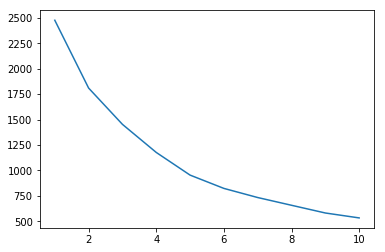

In [120]:
plt.plot(range(1,11),SS)
plt.show()

In [121]:
km1 = KMeans(n_clusters=6,n_init=50)
fit=km1.fit(numerical_copy)

In [122]:
fit.cluster_centers_

array([[ -2.60779190e-01,  -3.72480508e-01,  -4.34555023e-01,
         -9.85894192e-02,  -3.91531851e-01,  -1.91273001e-01],
       [ -5.37251066e-01,   6.73243456e-01,   9.26318202e-01,
         -3.43975490e-01,   9.62063360e-01,   2.30673419e-02],
       [  3.13830315e-01,   3.92190593e+00,   4.27561037e+00,
         -3.57419457e-03,   4.61816580e+00,   5.03365339e-01],
       [  1.96681731e+00,   5.17550306e+00,   1.28721685e+00,
          6.90059988e+00,  -5.54861977e-01,   1.64784475e+01],
       [  1.63989443e+00,   1.49047145e+00,   5.97820156e-01,
          1.19190015e+01,  -3.37956054e-01,   1.44986700e+00],
       [  1.75127879e+00,  -1.04019523e-01,  -1.95850577e-01,
          3.93265269e-01,  -3.77289430e-01,   3.38613160e-01]])

In [123]:
silhouette_score(numerical_copy,labels=fit.labels_)

0.36378107566113238

In [16]:
from scipy.stats.mstats import normaltest, skewtest,kurtosistest

In [6]:
normaltest(wholesale,axis=0)

NormaltestResult(statistic=masked_array(data = [-- 77.89419159610654 274.341626620409 410.6536426021091 374.02330569249034
 546.9039964068575 371.8199326361822 793.2983304166764],
             mask = [ True False False False False False False False],
       fill_value = 1e+20)
, pvalue=array([  2.37259915e-008,   1.21756235e-017,   2.67591739e-060,
         6.72503459e-090,   6.05161258e-082,   1.74303503e-119,
         1.82107359e-081,   5.46331572e-173]))

In [7]:
import matplotlib.pyplot as plt


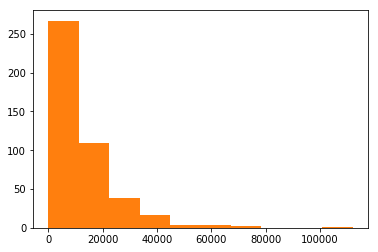

In [13]:
plt.hist(wholesale['Fresh'])
plt.show()

In [15]:
skewtest(wholesale['Fresh'])

SkewtestResult(statistic=13.363200236723891, pvalue=9.920555601203282e-41)

In [17]:
kurtosistest(wholesale['Fresh'])

KurtosistestResult(statistic=9.7860362789860691, pvalue=1.2926425480613438e-22)

In [18]:
from sklearn import preprocessing

In [19]:
fresh = preprocessing.scale(wholesale['Fresh'])

C:\Users\Umang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [33]:
fresh[:5]

array([ 0.05293319, -0.39130197, -0.44702926,  0.10011141,  0.84023948])

In [28]:
skewtest(fresh)

SkewtestResult(statistic=13.363200236723884, pvalue=9.9205556012042771e-41)

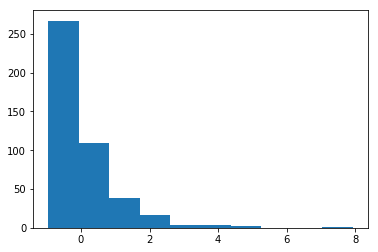

In [31]:
plt.hist(fresh)
plt.show()

In [25]:
mn = numerical.apply(lambda x:x.mean())
mn

0   -2.422305e-17
1   -1.589638e-17
2   -6.030530e-17
3    1.135455e-17
4   -1.917658e-17
5   -8.276208e-17
dtype: float64

In [26]:
md = numerical.apply(lambda x:x.median())
md

0   -0.276760
1   -0.294258
2   -0.336668
3   -0.318804
4   -0.433600
5   -0.198577
dtype: float64

In [27]:
mn-md

0    0.276760
1    0.294258
2    0.336668
3    0.318804
4    0.433600
5    0.198577
dtype: float64

In [29]:
numerical.describe()

,0,1,2,3,4,5
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [30]:
normaltest(numerical,axis=0)

NormaltestResult(statistic=masked_array(data = [274.34162662040876 410.6536426021092 374.02330569249045 546.9039964068572
 371.81993263618233 793.2983304166775],
             mask = [False False False False False False],
       fill_value = 1e+20)
, pvalue=array([  2.67591739e-060,   6.72503459e-090,   6.05161258e-082,
         1.74303503e-119,   1.82107359e-081,   5.46331572e-173]))

In [40]:
fresh_sqrt = np.sqrt(wholesale['Fresh'])

In [42]:
skewtest(fresh_sqrt)

SkewtestResult(statistic=5.3464179581919486, pvalue=8.97119163416385e-08)

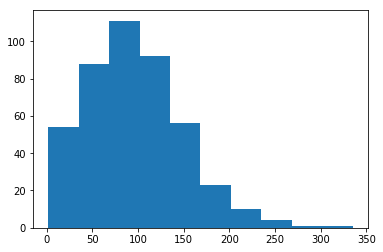

In [43]:
plt.hist(fresh_sqrt)
plt.show()